In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# part 1

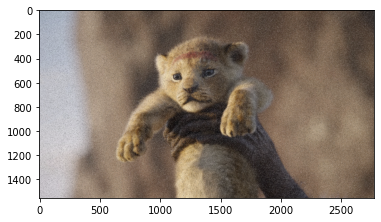

In [2]:
img = cv2.imread('../images/NoisySimba.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
def median_filter(image,k):
    n=k//2
    img=image.copy()
    img=img.astype(np.float64)
    output_img = np.zeros(img.shape)
    for i in range(n,img.shape[0]-n):
        for j in range(n,img.shape[1]-n):
            list_pixels=[]
            for p in range(i-n,i+n+1):
                for q in range(j-n,j+n+1):
                    list_pixels.append(image[p][q])
            list_pixels.sort()
            median_element = int(len(list_pixels) / 2)
            output_img[i][j] = list_pixels[median_element]
    output_img = output_img.astype(np.uint8)
    return output_img

In [4]:
def medianFilter(image,k):
    img= image.copy()
    img_op = np.zeros(img.shape)
    for x in range(3):
      img_op[:,:,x] = median_filter(img[:,:,x], k)

    return img_op.astype(np.uint8)

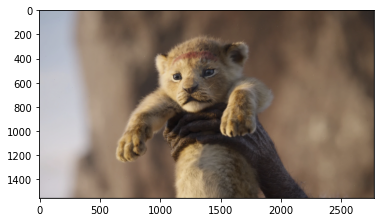

In [5]:
img_op = medianFilter(img,3)
plt.imshow(img_op)

# Part 2

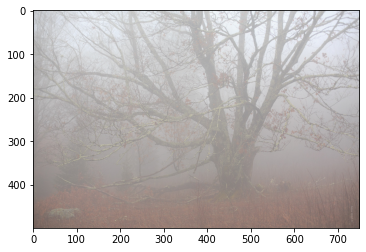

In [6]:
img = cv2.imread('../images/fog.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
def linContrastStretching(img):
    a = 0
    b = 255
    im = img.copy()
    ahigh = np.amax(im)
    alow = np.amin(im)
    amax=b
    amin=a
    im = im.astype(np.float64)
    im = (im-alow)*(amax-amin)/(ahigh-alow)
    im = im+a
    im = im.astype(np.uint8)
    return im

In [8]:
def colorLinContrastStretching(image):
    img= image.copy()
    img_op = np.zeros(img.shape)
    for x in range(3):
      img_op[:,:,x] = linContrastStretching(img[:,:,x])

    return img_op.astype(np.uint8)
    

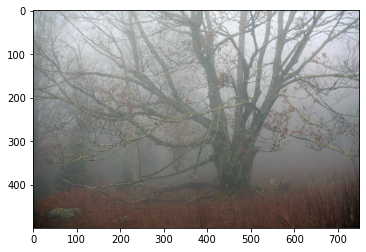

In [9]:
img_op = colorLinContrastStretching(img)
plt.imshow(img_op)

# Part3

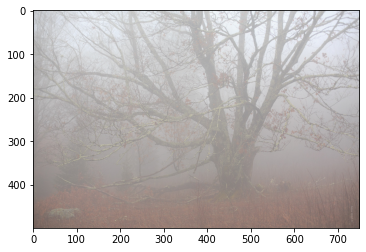

In [10]:
img = cv2.imread('../images/fog.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
def histEqualization(img):
    im = img.copy()
    size = im.shape[0]*im.shape[1]
    cdf = np.zeros(256)
    for i in range(0,256):
        cdf[i]=np.round((np.count_nonzero(im<=i)/size)*255)
    im = cdf[im]
    im = im.astype(np.uint8)
    return im


In [12]:
def histogram_equalization(image):
    img= image.copy()
    img_op = np.zeros(img.shape)
    for x in range(3):
      img_op[:,:,x] = histEqualization(img[:,:,x])

    return img_op.astype(np.uint8)

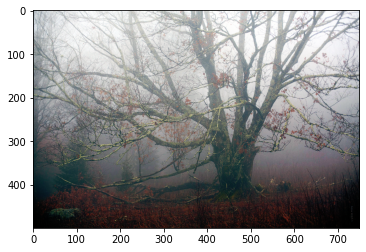

In [13]:
img_op = histogram_equalization(img)
plt.imshow(img_op)

# Part 4

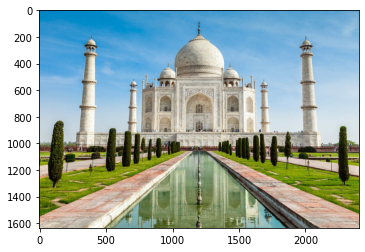

In [14]:
img = cv2.imread('../images/taj_mahal.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Vintage

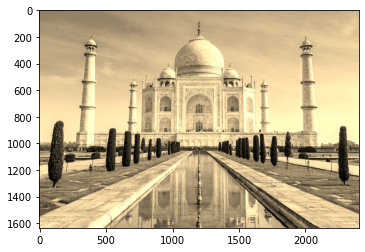

In [15]:
v = img.copy()
v = v.astype(np.float64)
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
v[:,:,0] = r * 0.293 + g * 0.769 + b * 0.219
v[:,:,1] = r * 0.249 + g * 0.686 + b * 0.188
v[:,:,2] = r * 0.172 + g * 0.534 + b * 0.151
v = np.where(v>255,255,v)
v = v.astype(np.uint8)
plt.imshow(v)

# Matrix effect

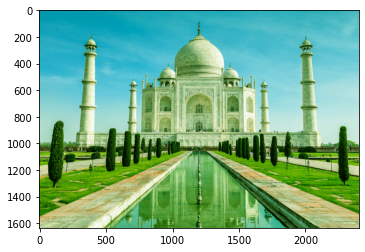

In [16]:
img = cv2.imread('../images/taj_mahal.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
v = img.copy()

v = v.astype(np.float64)

r = img[:,:,0]/255
g = img[:,:,1]/255
b = img[:,:,2]/255
v[:,:,0] = (r ** 1.5)*255
v[:,:,1] = (g ** 0.8)*255
v[:,:,2] = (b ** 1.5)*255
v = np.where(v>255,255,v)
v = v.astype(np.uint8)
plt.imshow(v)

# Vignetting

In [17]:
def getgausskernel(size,sigma):
    gaussian_kernel = np.zeros((size,size))
    n = size//2
    for i in range(size):
        for j in range(size):
                gaussian_kernel[i][j]=np.exp(-(((i-n)**2)+((j-n)**2))/(2*(sigma**2)))
    return gaussian_kernel

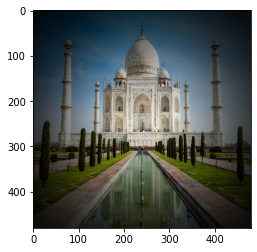

In [19]:
img_ip = cv2.resize(img,(480,480))
img_op = np.copy(img_ip)
r,c = img_ip.shape[:2]
X_kernel = getgausskernel(c,200)
Y_kernel = getgausskernel(r,200)
kernel = Y_kernel * X_kernel.T
    
mask = 255 * kernel / np.linalg.norm(kernel)

for i in range(3):
    img_op[:,:,i] = img_op[:,:,i] * mask
plt.imshow(img_op)

# Duo tone

In [20]:
img_ip = img.copy()
def duotone(im,color_no):
    img = im.copy()
    for i in range(3):
        if i == color_no:
            values = np.arange(0, 256)
            table = np.array([min((i**1.05), 255) for i in values])
            table = table.astype("uint8")
            img[:, :, i] = cv2.LUT(img[:, :, i], table)
        else:
            img[:, :, i] = 0
    return img

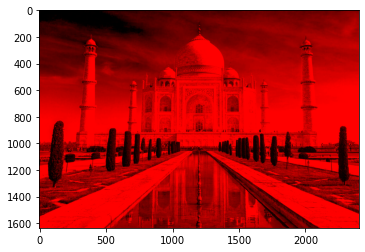

In [21]:
img_op = duotone(img_ip,0) # 0: R 1: G 2: B
plt.imshow(img_op)

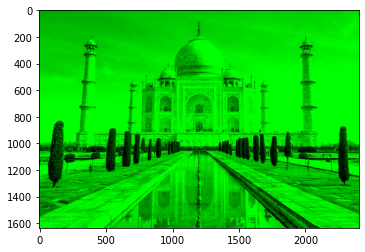

In [22]:
img_op = duotone(img_ip,1) # 0: R 1: G 2: B
plt.imshow(img_op)

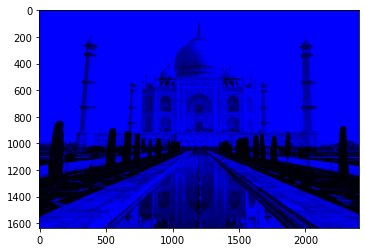

In [23]:
img_op = duotone(img_ip,2) # 0: R 1: G 2: B
plt.imshow(img_op)